# <center> Taller Keras $-$ Ejercicio 2

# Quistian Navarro Juan Luis

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.utils import to_categorical

from pandas import DataFrame
from pandas_ml import ConfusionMatrix
from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

# Introducción a las Redes Convolucionales (ConvNets, CNNs)

__Objetivo:__
* En este ejercicio se implementará una red neuronal convolucional, incluyendo Dropout.

## Base de datos MNIST

En el ejemplo de la red Multicapa alcanzamos una predicción cercano al 98%, mientras que con una red convolucional, alcanzamos 99.1%. Veremos ahora si agregando Dropout, se mejora el desempeño de nuestra red.

In [3]:
# cargar la interfaz a la base de datos que viene con Keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Pre-procesamiento de los datos

In [5]:
# reshape y normalización
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

A continuación definimos una red neuronal convolucional (CNN).

__Ejercicio:__ Defina un modelo de red convolucional convNet, con tres capas convolucionales _Conv2D_. El número de filtros de esas capas es de su elección. Use un kernel_size = (3,3), y funciones de activación ReLU. (stride=1 y padding='valid')

Luego de cada capa convolucional, agregue una canpa Dropout, con una tasa de eliminación (rate) de 25%.

Añada capas convolucionales, capas _MaxPooling2D_. Use un pool_size = (2,2).

Posteriormente, agregue una capa _Flatten_ a la red convolucional \texttt{convnet} anterior. Luego, agregue una capa oculta _Dense_ con 64 neuronas, y una capa de salida _Dense_ con 10 neuronas. Use funciones de activación ReLU (y softmax en la capa de salida).

Asegúrese que las capas tienen nombres distintos, e incluya el parámetro input_shape en la primer capa.

In [6]:
if 'convnet' in globals(): del convnet

### START CODE HERE ### (≈ ? lines of code)
convnet = models.Sequential()

convnet.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=data_shape, name='conv1'))
convnet.add(layers.Dropout(rate=0.25, name='drop1'))
convnet.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='conv2'))
convnet.add(layers.Dropout(rate=0.25, name='drop2'))
convnet.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='conv3'))
convnet.add(layers.Dropout(rate=0.25, name='drop3'))

convnet.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='conv4'))
convnet.add(layers.MaxPooling2D(pool_size=(2, 2)))
convnet.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='conv5'))

convnet.add(layers.Flatten(name='flat1'))

convnet.add(layers.Dense(64, activation='relu', name='dense1'))
convnet.add(layers.Dense(10, activation='softmax', name='classifier'))

### END CODE HERE ###

In [7]:
convnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
drop1 (Dropout)              (None, 26, 26, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 32)        9248      
_________________________________________________________________
drop2 (Dropout)              (None, 24, 24, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 22, 22, 64)        18496     
_________________________________________________________________
drop3 (Dropout)              (None, 22, 22, 64)        0         
_________________________________________________________________
conv4 (Conv2D)               (None, 20, 20, 32)        1

### Entrenamiento

__Ejercicio:__ Defina el optimizador, la función de pérdida y las métricas para su entrenamiento.
Posteriormente, entrene su red convolucional.

_Sugerencia_: use un pequeño número de iteraciones. Si ve que el tiempo de entrenamiento tardará demasiado, redefina su red neuronal (con menos filtros, o menos capas) o reduzca su conjunto de entrenamiento (tome una muestra de los datos de entrenamiento), e intente entrenar de nuevo.

In [11]:
### START CODE HERE ### (≈ 2 lines of code)
opt = optimizers.RMSprop(lr=0.001)
convnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
### END CODE HERE ###

### START CODE HERE ### (≈ 1 lines of code)
tic = time()
history =  convnet.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.16666)
print('total training time:', time()-tic, 'seconds')
### END CODE HERE ###

c:\Users\juanq\anaconda3\envs\keras\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
391/391 [==============================] - 154s 393ms/step - loss: 1.2536 - accuracy: 0.5391 - val_loss: 0.1696 - val_accuracy: 0.9527
Epoch 2/5
391/391 [==============================] - 147s 375ms/step - loss: 0.1586 - accuracy: 0.9518 - val_loss: 0.1001 - val_accuracy: 0.9693
Epoch 3/5
391/391 [==============================] - 28120s 72s/step - loss: 0.0949 - accuracy: 0.9715 - val_loss: 0.1028 - val_accuracy: 0.9696
Epoch 4/5
391/391 [==============================] - 218s 558ms/step - loss: 0.0696 - accuracy: 0.9783 - val_loss: 0.0710 - val_accuracy: 0.9819
Epoch 5/5
391/391 [==============================] - 155s 396ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0512 - val_accuracy: 0.9855
total training time: 28793.37349486351 seconds


### Ver el historial de desempeño de la red

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

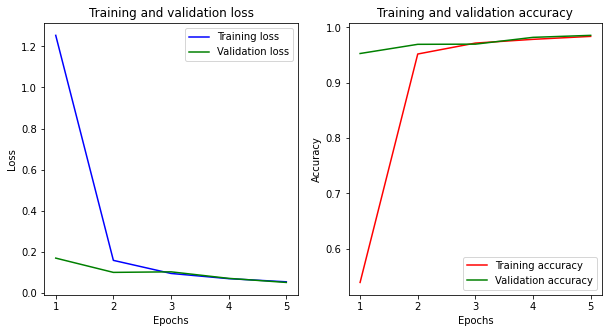

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluando resultados

In [15]:
results = convnet.evaluate(test_images, test_labels)
print('test loss:', results[0])
print('test accuracy:', results[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.0481 - accuracy: 0.9854
test loss: 0.04809614643454552
test accuracy: 0.9854000210762024


### Resultados

In [16]:
pred = convnet.predict(test_images)
predictions = np.argmax(pred, 1)

In [17]:
test_labs = np.argmax(test_labels, 1)
confusion_matrix = ConfusionMatrix(test_labs, predictions)

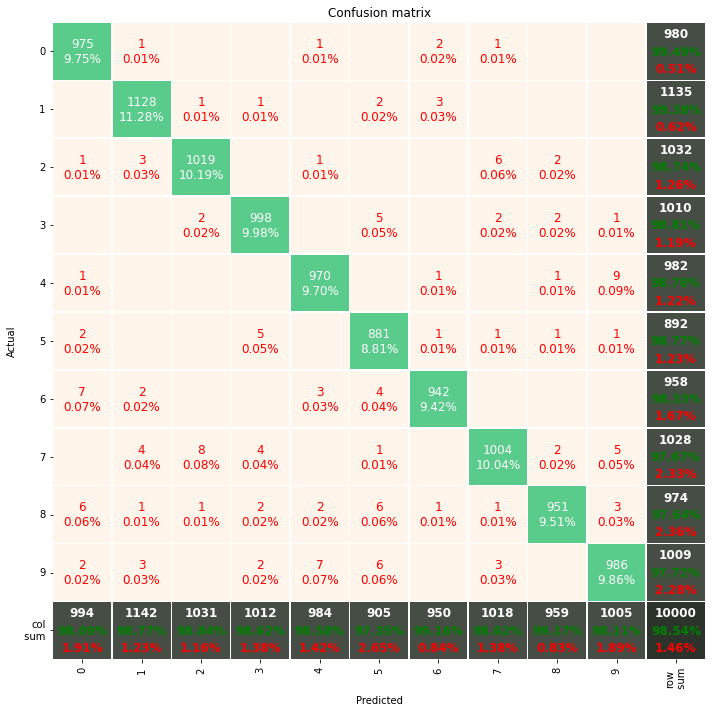

In [18]:
# plot confusion matrix
CM = confusion_matrix.to_array()
cf = DataFrame(CM)
pretty_plot_confusion_matrix(cf, annot=True, pred_val_axis='x', figsize=(10,10), fz=12)

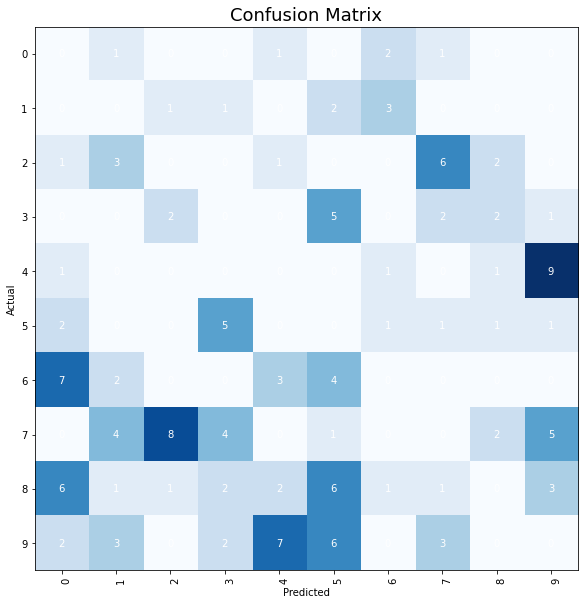

In [19]:
# other plot
PlotMatrix(CM, figsize=(10,10), cmap=plt.cm.Blues, title='Confusion Matrix', fz=15)

In [20]:
# save model
#convnet.save('convnet+dropout.h5')

__Ejercicio:__ Repita el experimento con otros modelos diferentes.

Pruebe cambiar el número de filtros de las capas convolucionales, use kernel_size de otro tamaño, y funciones de activación distintas. Experimente qué sucede si cambia los parámetros de stride y padding.

Similarmente, experimente cambiando (o quitando) la tasa de Dropout. Experimente también con el parámetro pool_size en las capas de MaxPooling.

Puede probar otros optimizadores, u otras funciones de pérdida. Por último, compare sus diferentes modelos para determinar cuál tiene un mejor desempeño.

---

---